# Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [1]:
# import necessary liabrary

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
medical=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# let check whether null persent or not
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# lets see the number of row and column
medical.shape

(1338, 7)

In [5]:
# lets check the info of the dataset
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory data analysis

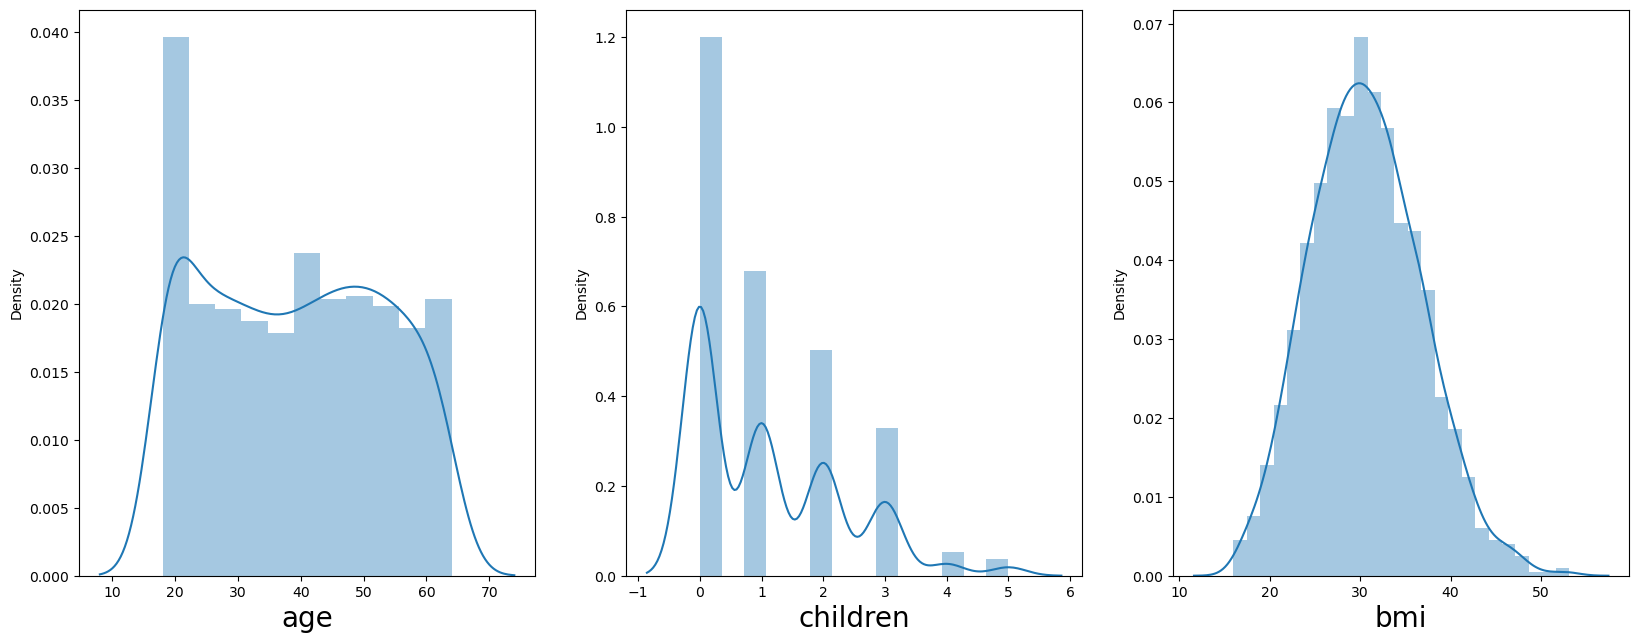

In [7]:
plt.figure(figsize=(20, 25))
plotnumber = 1
columns = ['age', 'children', 'bmi']  # List of columns to plot

for column in columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(medical[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

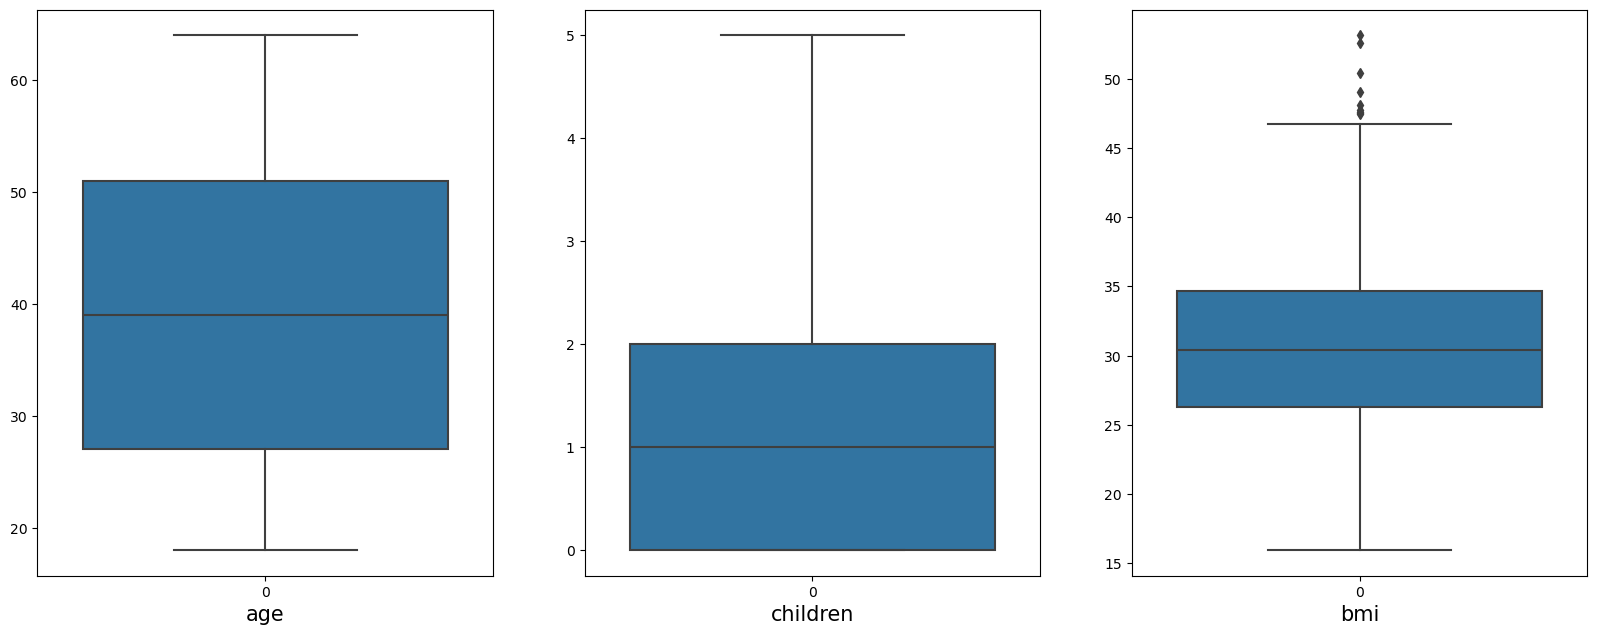

In [8]:
plt.figure(figsize=(20, 25))
columns = ['age', 'children', 'bmi']
graph = 1

for column in columns:
    if graph <= 5:
        plt.subplot(3, 3, graph)
        ax = sns.boxplot(data=medical[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

bmi graph containing outlier so let fix it

In [9]:


# Define a function to handle outlier removal for multiple columns
def remove_outliers(medical, column):
    q1 = medical[column].quantile(0.25)
    q3 = medical[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((medical[column] < low_limit) | (medical[column] > high_limit))
    
    # Drop rows with outliers
    medical = medical.drop(medical.index[index])
    
    return medical

# List of columns to handle outliers
columns_to_check = ['age', 'children', 'bmi']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    medical= remove_outliers(medical, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = medical.shape

# Reset index of the 'data' dataframe
medical.reset_index(drop=True, inplace=True)


In [10]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


as we see the outlier has been 9 removed lets recheck it

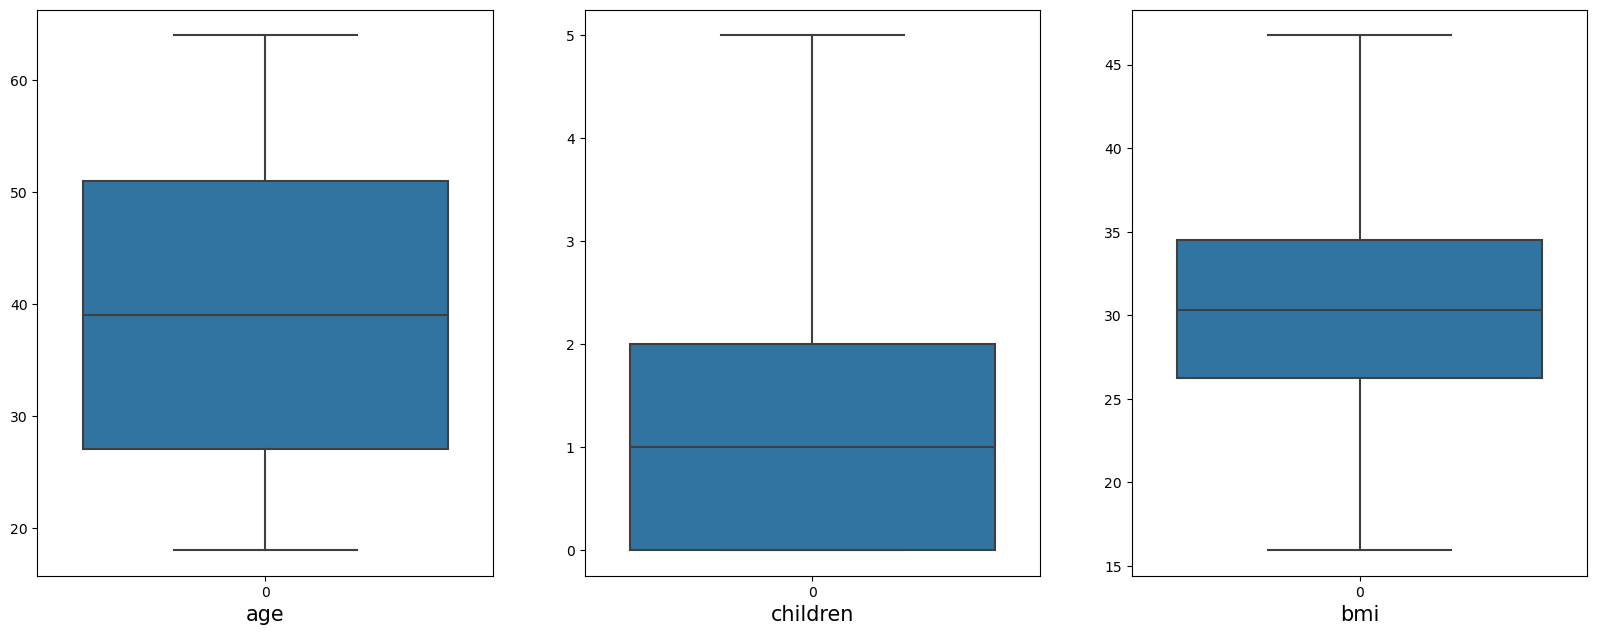

In [11]:
plt.figure(figsize=(20, 25))
columns = ['age', 'children', 'bmi']
graph = 1

for column in columns:
    if graph <= 5:
        plt.subplot(3, 3, graph)
        ax = sns.boxplot(data=medical[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

now the outlier has been removed

In [12]:
medical.describe()

,age,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,30.537348,1.096313,13212.333374
std,14.047835,5.919946,1.207928,11997.236429
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.300000,1.000000,9361.326800
75%,51.000000,34.485000,2.000000,16586.497710
max,64.000000,46.750000,5.000000,62592.873090


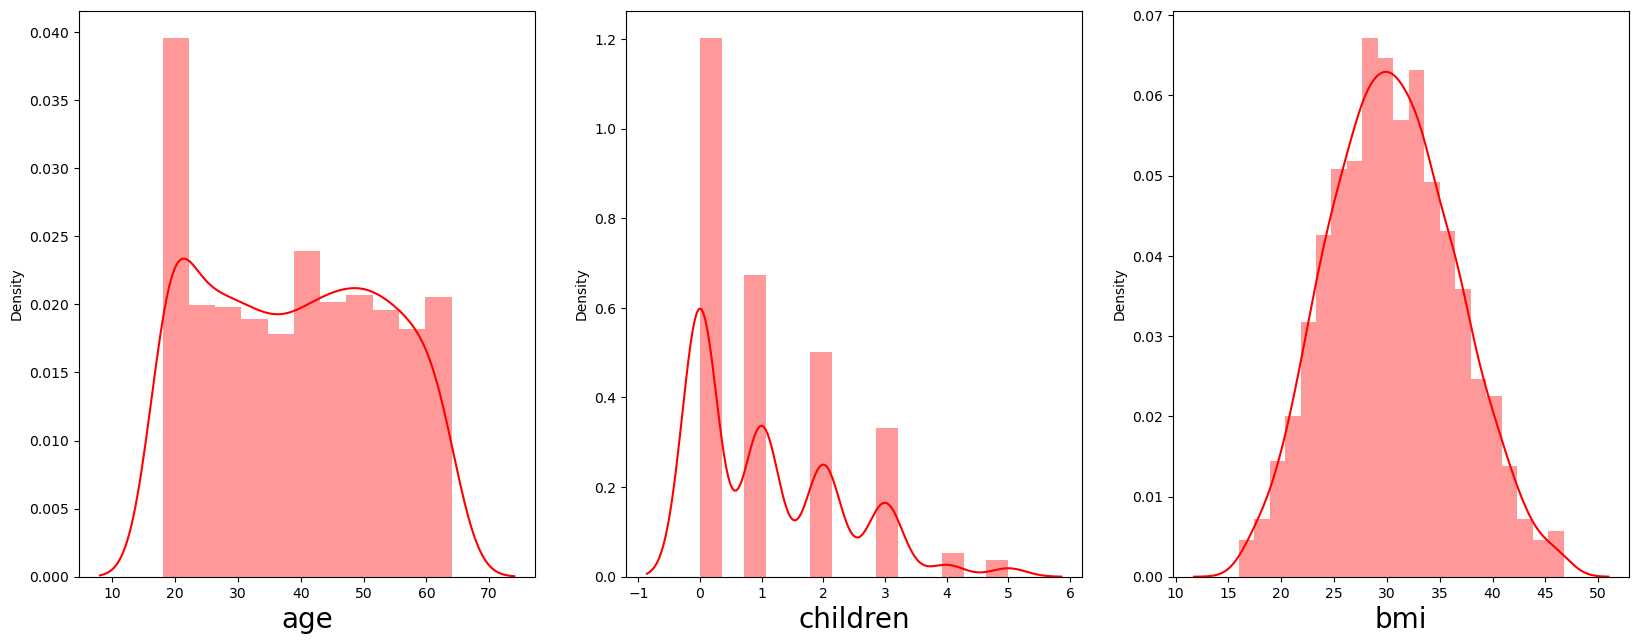

In [13]:
plt.figure(figsize=(20, 25))

plotnumber = 1
columns = ['age', 'children', 'bmi']  # List of columns to plot

for column in columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(medical[column], color='red') 
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

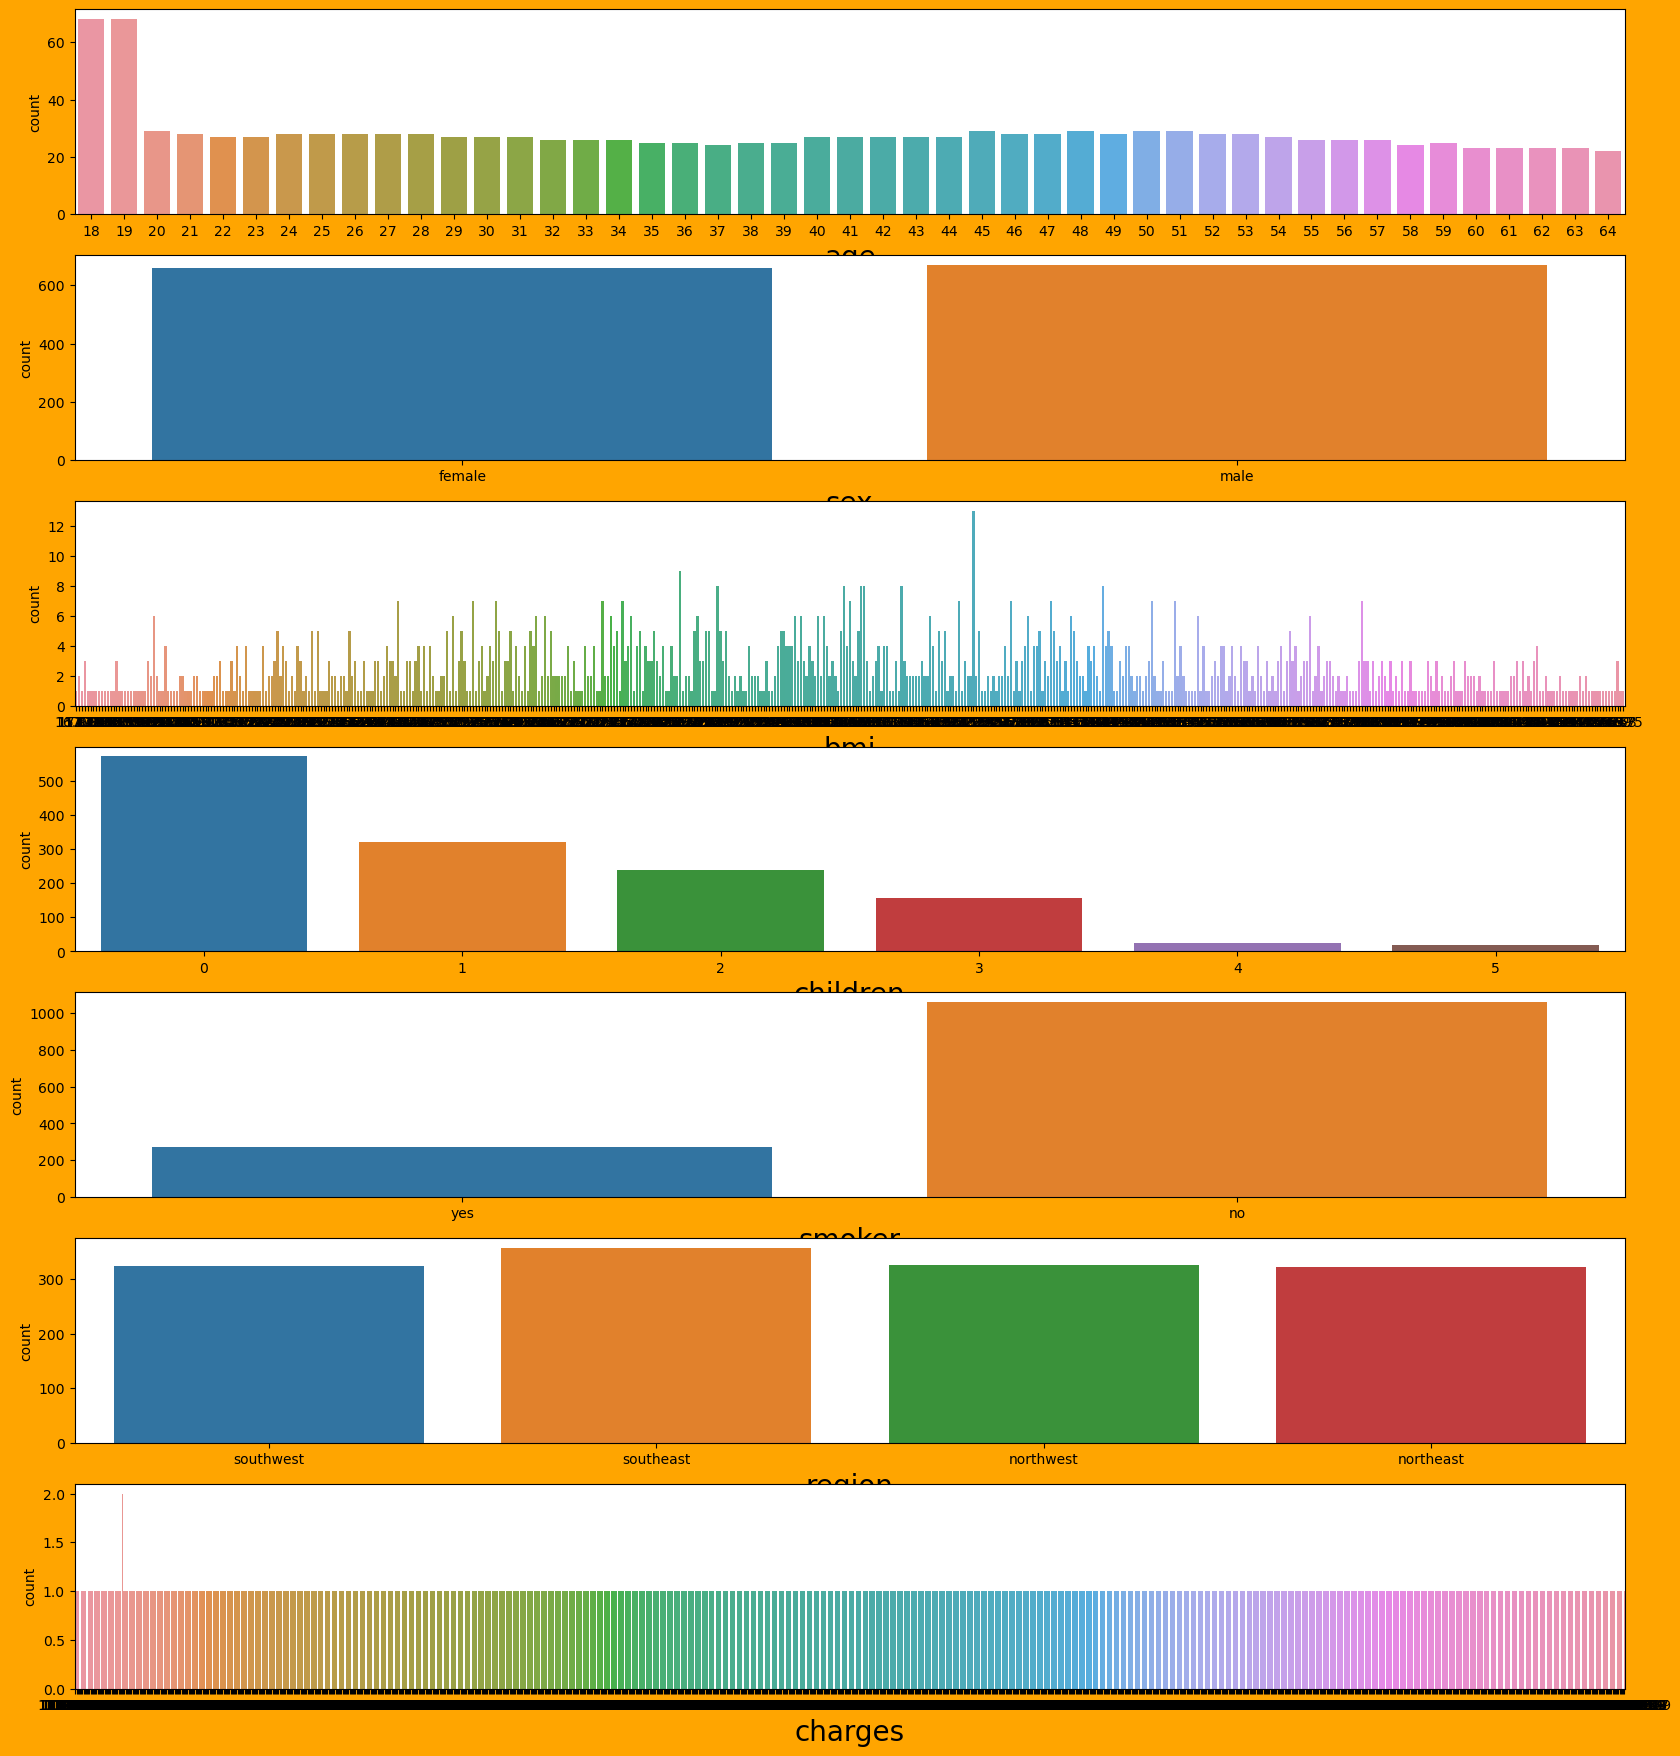

In [14]:
# lets see whether out dataset is balanced or not
plt.figure(figsize=(20, 25), facecolor='orange')



plotnumber = 1
for column in medical.columns:
    if plotnumber <= 8:
        ax = plt.subplot(8, 1, plotnumber)
        sns.countplot(x=column, data=medical)
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

# data preprocessing

ending the categorical features

In [15]:
medical.replace({'sex':{'male':0,'female':1}},inplace=True)
medical.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [16]:
X=medical.drop(columns='charges',axis=1)
Y=medical['charges']

In [17]:
X


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1324,50,0,30.970,3,1,3
1325,18,1,31.920,0,1,2
1326,18,1,36.850,0,1,0
1327,21,1,25.800,0,1,1


In [18]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1324    10600.54830
1325     2205.98080
1326     1629.83350
1327     2007.94500
1328    29141.36030
Name: charges, Length: 1329, dtype: float64

# train and test data

In [19]:
# data scaling formula Z=(X-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.43876391,  1.00831144, -0.44566964, -0.90793956, -1.97586919,
        -0.41048755],
       [-1.50997605, -0.99175707,  0.54626664, -0.07976408,  0.50610638,
        -1.29610111],
       [-0.79785463, -0.99175707,  0.41614893,  1.57658687,  0.50610638,
        -1.29610111],
       ...,
       [-1.50997605,  1.00831144,  1.06673747, -0.90793956,  0.50610638,
        -1.29610111],
       [-1.29633963,  1.00831144, -0.80053612, -0.90793956,  0.50610638,
        -0.41048755],
       [ 1.55214607,  1.00831144, -0.24795832, -0.90793956, -1.97586919,
         1.36073958]])

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=355)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(1329, 6) (996, 6) (333, 6)


# model training

In [22]:
reg=LinearRegression()

In [23]:
reg.fit(X_train,Y_train)

LinearRegression()

# model evaluation

In [24]:
# check the R2
predicted_sales=reg.predict(X)
r2_score(Y,predicted_sales)*100

74.9286589510775

In [25]:
medical.sample(10)

,age,sex,bmi,children,smoker,region,charges
132,19,0,25.555,0,1,3,1632.56445
295,47,0,25.410,1,0,0,21978.67690
995,24,0,32.700,0,0,1,34472.84100
632,19,1,24.510,1,1,3,2709.11190
545,43,1,46.200,0,0,0,45863.20500
1074,32,0,27.835,1,1,3,4454.40265
562,38,1,40.565,1,1,3,6373.55735
1222,52,0,34.485,3,0,3,60021.39897
921,57,1,20.100,1,1,1,12032.32600
912,61,1,28.200,0,1,1,13041.92100


In [26]:
# since we have already fit the scaler you can transform the data
print('Medical_cost-',reg.predict(scaler.transform([[18,1,41.240,0,0,1]])))

Medical_cost- [56774.33144658]


In [27]:
# predicting test data with the model
Y_test_pred=reg.predict(X_test)

In [28]:
# model evaluation
accuracy= metrics.r2_score(Y_test,Y_test_pred)
print('R square score:',accuracy)

R square score: 0.7630259676951426


# as you see the accuracy is very low so lets use randimizedSearchCV

# hyperparameter tuning using RandimizedSearchCV

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [30]:
ada=AdaBoostRegressor()

In [31]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.19,0.35,0.40]}

In [32]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [33]:
rnd_srch.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.19, 0.35, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [34]:
ada=AdaBoostRegressor(learning_rate=0.35,n_estimators=47)
ada.fit(X_train,Y_train)
y_pred=ada.predict(X_test)
print('****accuracy post tuning*********')

print(metrics.r2_score(Y_test,y_pred))

****accuracy post tuning*********
0.8341905305777024


In [36]:
# Get input data from the user for 6 features
input_data = input("Enter 6 features separated by spaces: ")
input_data_list = input_data.split()  # Split the input into a list of strings

try:
    # Convert input data to a numpy array and reshape for 11 features
    input_data_as_numpy_array = np.asarray(input_data_list, dtype=float).reshape(1, -1)

    # Make prediction using the RandomForestClassifier model
    prediction = ada.predict(input_data_as_numpy_array)
    print(prediction)
    print('insurance cost in usd',prediction[0])
except ValueError:
    print("Error: Input data must be numeric. Please enter numeric values separated by spaces.")

Enter 6 features separated by spaces:  19	0	25.555	0	1	3


[5711.7672146]
insurance cost in usd 5711.767214595373
